<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_03/blob/test-case-5/testcase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Max Courant number: 0.5475622351636756


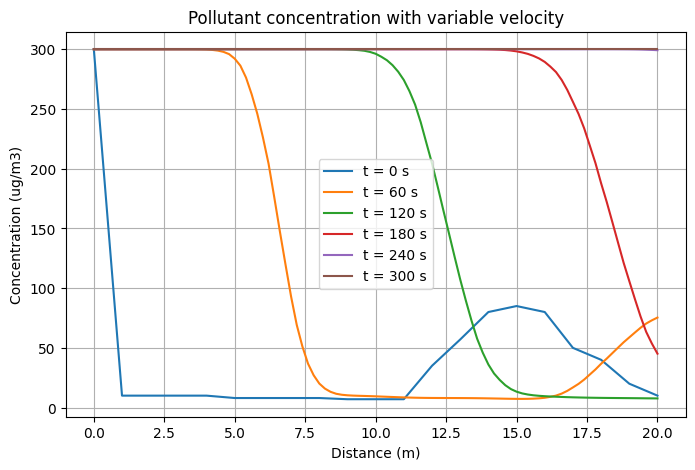

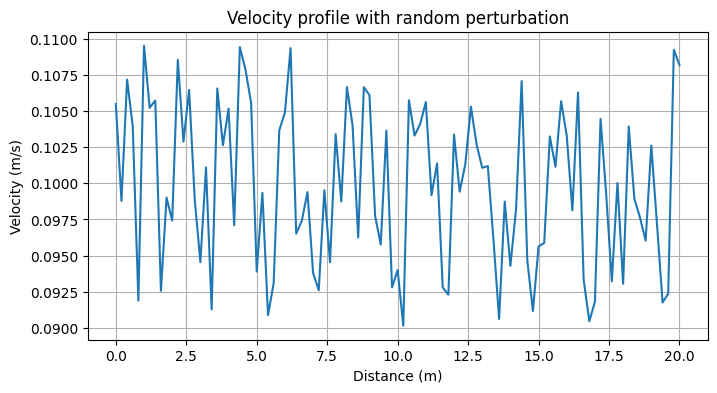

Minimum concentration: 7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# model parameters
# courant small enough for model to behave
riverLength = 20.0      # length of river (m)
spatialResolution = 0.2 # spatial step (m)
totalT = 300.0          # total time (s)
dt = 1.0                # time step (s)
u = 0.1                 # mean velocity (m/s)

# grid
newD = np.arange(0, riverLength + spatialResolution, spatialResolution)
t = np.arange(0, totalT + dt, dt)

# initial conditions (given data)
Distance = np.arange(0, 21, 1)
Concentration = np.array([
    300, 10, 10, 10, 10, 8, 8, 8, 8, 7,
    7, 7, 35, 57, 80, 85, 80, 50, 40, 20, 10
])

# interpolate onto grid
newC = np.interp(newD, Distance, Concentration)

# variable velocity (±10%)
rng = np.random.default_rng(42)
u_profile = u * (1 + rng.uniform(-0.1, 0.1, len(newD)))

# make sure velocity stays positive
u_profile[u_profile <= 0] = 1e-6

# check stability (CFL condition)
courant = np.max(u_profile) * dt / spatialResolution
print("Max Courant number:", courant)

# time stepping (upwind scheme)
theta_hist = np.zeros((len(t), len(newD)))
theta_hist[0] = newC.copy()

# keep upstream concentration fixed
theta_in = newC[0]

for n in range(1, len(t)):
    theta_new = newC.copy()
    theta_new[0] = theta_in

    for i in range(1, len(newD)):
        theta_new[i] = newC[i] - (u_profile[i] * dt / spatialResolution) * (newC[i] - newC[i-1])

    newC = theta_new
    theta_hist[n] = newC

# plot concentration profiles
plt.figure(figsize=(8,5))

times_to_plot = [0, 60, 120, 180, 240, 300]

for time in times_to_plot:
    idx = int(time / dt)
    plt.plot(newD, theta_hist[idx], label="t = " + str(time) + " s")

plt.xlabel("Distance (m)")
plt.ylabel("Concentration (ug/m3)")
plt.title("Pollutant concentration with variable velocity")
plt.legend()
plt.grid()
plt.show()

# plot velocity profile
plt.figure(figsize=(8,4))
plt.plot(newD, u_profile)
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity profile with random perturbation")
plt.grid()
plt.show()

# check for negative values
print("Minimum concentration:", theta_hist.min())
